# Import Base Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
prospect_data = pd.read_csv('Test.csv')
prospect_data.head(5)
prospect_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind1    19 non-null     int64
 1   Ind2    19 non-null     int64
 2   Ind3    19 non-null     int64
 3   Ind4    19 non-null     int64
 4   Ind5    19 non-null     int64
 5   Ind6    19 non-null     int64
 6   Ind7    19 non-null     int64
 7   Ind8    19 non-null     int64
 8   Ind9    19 non-null     int64
 9   Ind10   19 non-null     int64
 10  Ind11   19 non-null     int64
 11  Ind12   19 non-null     int64
 12  Ind13   19 non-null     int64
 13  Ind14   19 non-null     int64
 14  Ind15   19 non-null     int64
 15  Ind16   19 non-null     int64
dtypes: int64(16)
memory usage: 2.5 KB


# Import Libraries for Decision Tree 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

# Define features

In [4]:
# Extract feature columns
feature_cols = list(prospect_data.columns[1:14])

# Extract target column
target_col = prospect_data.columns[14] 

weight_col=prospect_data.columns[15]

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = prospect_data[feature_cols]
Y_all = prospect_data[target_col]
X_weight = prospect_data[weight_col]
X_all.head()
Y_all.head()
X_weight.head()

0    1
1    1
2    1
3    1
4    1
Name: Ind16, dtype: int64

In [5]:
Y_all.head()

0    1
1    1
2    1
3    1
4    1
Name: Ind15, dtype: int64

In [6]:
X_all.head()

,Ind2,Ind3,Ind4,Ind5,Ind6,Ind7,Ind8,Ind9,Ind10,Ind11,Ind12,Ind13,Ind14
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1


# Process Categorical Features

In [7]:
def preprocess_features(X):
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
X_all.head()

,Ind2,Ind3,Ind4,Ind5,Ind6,Ind7,Ind8,Ind9,Ind10,Ind11,Ind12,Ind13,Ind14
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1


# Process Null - Replace with 0

In [8]:
#Null Treatment
X_all.fillna(value=0, inplace = True )
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind2    19 non-null     int64
 1   Ind3    19 non-null     int64
 2   Ind4    19 non-null     int64
 3   Ind5    19 non-null     int64
 4   Ind6    19 non-null     int64
 5   Ind7    19 non-null     int64
 6   Ind8    19 non-null     int64
 7   Ind9    19 non-null     int64
 8   Ind10   19 non-null     int64
 9   Ind11   19 non-null     int64
 10  Ind12   19 non-null     int64
 11  Ind13   19 non-null     int64
 12  Ind14   19 non-null     int64
dtypes: int64(13)
memory usage: 2.1 KB


# Train Test Split

In [9]:
#randomly shuffle data into training and testing sets
from sklearn.model_selection import train_test_split
X_all1, X_all2, Y_all1, Y_all2, X_weight1, X_weight2 = train_test_split(X_all, Y_all, X_weight, train_size=0.9, random_state=42)

In [10]:
X_weight1 = np.array(X_weight1)

In [11]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=100)
clf_gini.fit(X_all1, Y_all1,sample_weight=X_weight1)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=100, random_state=100)

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve
pred_probs = clf_gini.predict_proba(X_all2)[:,1]
fpr, tpr, thres = roc_curve(Y_all2, pred_probs)
roc_auc_score(Y_all2, pred_probs)

IndexError: index 1 is out of bounds for axis 1 with size 1

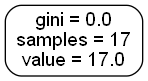

In [13]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=list(X_all1), 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [14]:
graph.write_pdf("Tree.pdf")

True


# Feature Importance

In [15]:
feature_names_test = np.array(X_all1)

In [16]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    print(fi_df.nlargest(30,'feature_importance'))

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

   feature_names  feature_importance
0           Ind2                 0.0
1           Ind3                 0.0
2           Ind4                 0.0
3           Ind5                 0.0
4           Ind6                 0.0
5           Ind7                 0.0
6           Ind8                 0.0
7           Ind9                 0.0
8          Ind10                 0.0
9          Ind11                 0.0
10         Ind12                 0.0
11         Ind13                 0.0
12         Ind14                 0.0


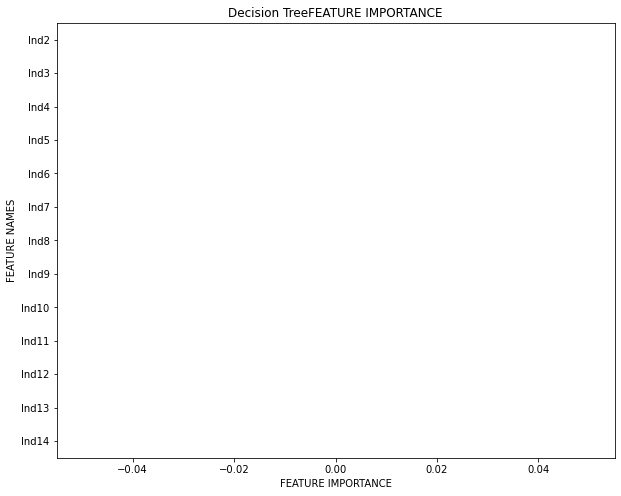

In [17]:
importance=clf_gini.feature_importances_
plot_feature_importance(importance,X_all1.columns,'Decision Tree')

# Redo Tree After removing 

In [18]:
X_all.head()

,Ind2,Ind3,Ind4,Ind5,Ind6,Ind7,Ind8,Ind9,Ind10,Ind11,Ind12,Ind13,Ind14
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1


In [19]:
X_all_new = X_all
X_all_new.head()

,Ind2,Ind3,Ind4,Ind5,Ind6,Ind7,Ind8,Ind9,Ind10,Ind11,Ind12,Ind13,Ind14
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1


In [20]:
X_all_new.drop(['Ind2'],axis=1,inplace=True)

In [21]:
X_all_new.head()

,Ind3,Ind4,Ind5,Ind6,Ind7,Ind8,Ind9,Ind10,Ind11,Ind12,Ind13,Ind14
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1


In [22]:
#randomly shuffle data into training and testing sets
from sklearn.model_selection import train_test_split
X_all1_new, X_all2_new, Y_all1_new, Y_all2_new, X_weight1_new, X_weight2_new = train_test_split(X_all_new, Y_all, X_weight, train_size=0.8, random_state=42)

In [23]:
X_weight1_new = np.array(X_weight1_new)

In [24]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=100)
clf_gini.fit(X_all1_new, Y_all1_new,sample_weight=X_weight1_new)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=100, random_state=100)

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
pred_probs = clf_gini.predict_proba(X_all2_new)[:,1]
fpr, tpr, thres = roc_curve(Y_all2_new, pred_probs)
roc_auc_score(Y_all2_new, pred_probs)

IndexError: index 1 is out of bounds for axis 1 with size 1

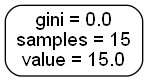

In [26]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=list(X_all1_new), 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [46]:
graph.write_pdf("Dummy.pdf")

True